In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
! kaggle datasets download -d datamunge/sign-language-mnist

 94% 59.0M/62.6M [00:00<00:00, 131MB/s]
100% 62.6M/62.6M [00:00<00:00, 139MB/s]


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
! unzip /content/sign-language-mnist.zip

Archive:  /content/sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
train_path = "/content/sign_mnist_train.csv"
test_path = "/content/sign_mnist_test.csv"

In [ ]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
x_train = train.drop('label',axis=1).values
y_train = train['label'].values
x_test = test.drop('label',axis=1).values
y_test = test['label'].values

In [ ]:
x_train.shape,y_train.shape

((27455, 784), (27455,))

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train = tf.reshape(x_train,[-1,28,28,1])

In [ ]:
x_test = tf.reshape(x_test,[-1,28,28,1])

In [ ]:
y_train.shape

(27455,)

In [ ]:
sample_x = x_train[0]

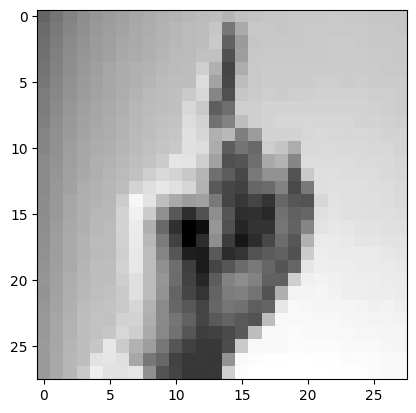

In [ ]:
plt.imshow(sample_x,cmap='gray')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

In [ ]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(24, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= Adam(),metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size = 128)

Epoch 1/10
215/215 [==============================] - 13s 8ms/step - loss: 1.2447 - accuracy: 0.6174
Epoch 2/10
215/215 [==============================] - 2s 7ms/step - loss: 0.0775 - accuracy: 0.9800
Epoch 3/10
215/215 [==============================] - 2s 7ms/step - loss: 0.0060 - accuracy: 0.9999
Epoch 4/10
215/215 [==============================] - 2s 7ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/10
215/215 [==============================] - 2s 7ms/step - loss: 9.2380e-04 - accuracy: 1.0000
Epoch 6/10
215/215 [==============================] - 2s 7ms/step - loss: 5.9060e-04 - accuracy: 1.0000
Epoch 7/10
215/215 [==============================] - 2s 8ms/step - loss: 3.9781e-04 - accuracy: 1.0000
Epoch 8/10
215/215 [==============================] - 2s 8ms/step - loss: 2.8685e-04 - accuracy: 1.0000
Epoch 9/10
215/215 [==============================] - 2s 7ms/step - loss: 2.1801e-04 - accuracy: 1.0000
Epoch 10/10
215/215 [==============================] - 2s 7ms/step - loss: 1.67

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

#save model
ts = int(time.time())
file_path = f"/content/drive/MyDrive/Colab Notebooks/Projects/tensor-server/sign_classifier/{ts}/"
model.save(filepath=file_path, save_format='tf')

Accuracy: 0.928
